In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("spam.csv",names=['Message','Labels'])

In [6]:
df.shape

(5572, 2)

In [7]:
df.columns

Index(['Message', 'Labels'], dtype='object')

In [8]:
df.dtypes

Message    object
Labels     object
dtype: object

In [9]:
df.info

<bound method DataFrame.info of                                                 Message Labels
0     Go until jurong point, crazy.. Available only ...    ham
1                         Ok lar... Joking wif u oni...    ham
2     Free entry in 2 a wkly comp to win FA Cup fina...   spam
3     U dun say so early hor... U c already then say...    ham
4     Nah I don't think he goes to usf, he lives aro...    ham
...                                                 ...    ...
5567  This is the 2nd time we have tried 2 contact u...   spam
5568              Will Ì_ b going to esplanade fr home?    ham
5569  Pity, * was in mood for that. So...any other s...    ham
5570  The guy did some bitching but I acted like i'd...    ham
5571                         Rofl. Its true to its name    ham

[5572 rows x 2 columns]>

In [10]:
df.head()

,Message,Labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [11]:
df.groupby('Labels').describe()

Message                                                               
         count unique                                                top freq
Labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [12]:
df['spam']=df['Labels'].apply (lambda x:1 if x=='spam' else 0)

In [13]:
df.head()

,Message,Labels,spam
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,random_state=0,test_size=0.2)

In [15]:
x_train.shape


(4457,)

In [16]:
x_test.shape

(1115,)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
v=CountVectorizer()
x_train_count=v.fit_transform(x_train)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
x_test_count=v.transform(x_test)
x_test_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
model1=MultinomialNB()
model1.fit(x_train_count,y_train)

MultinomialNB()

In [22]:
pred1=model1.predict(x_test_count)

In [23]:
model1.score(x_test_count,y_test)

0.9874439461883409

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

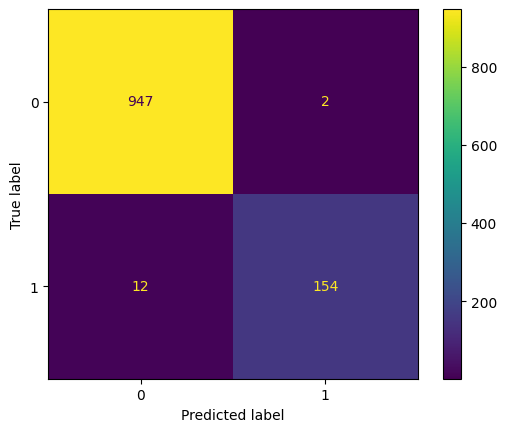

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,pred1)

In [31]:
accuracy_score(y_test,pred1)

0.9874439461883409

In [32]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.99      0.93      0.96       166

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [37]:
from sklearn.naive_bayes import GaussianNB

In [41]:
model2=GaussianNB()
model2.fit(x_train_count.toarray(),y_train)

GaussianNB()

In [43]:
pred2=model2.predict(x_test_count.toarray())

In [44]:
model2.score(x_test_count.toarray(),y_test)

0.9013452914798207

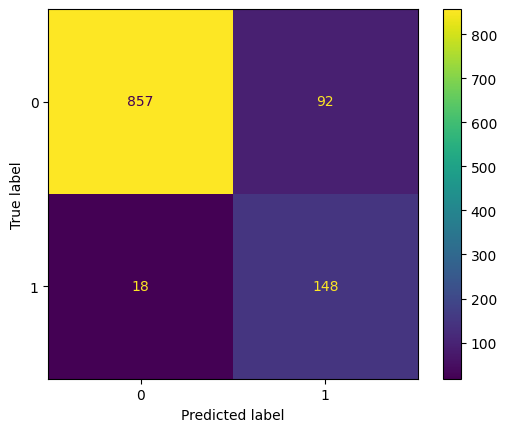

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test,pred2)

In [46]:
accuracy_score(y_test,pred2)

0.9013452914798207

In [47]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       949
           1       0.62      0.89      0.73       166

    accuracy                           0.90      1115
   macro avg       0.80      0.90      0.83      1115
weighted avg       0.93      0.90      0.91      1115

